In [1]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Clean any previous clones
!rm -rf stylegan2-ada-pytorch

In [3]:
# STEP 2: Clone StyleGAN2-ADA
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch


Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch


In [4]:
# STEP 3: Install PyTorch & StyleGAN2-ADA compatible packages for Python 3.11
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu118
!pip install click requests tqdm pyspng ninja imageio-ffmpeg


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 507.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 107.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling tor

In [4]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git


Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [5]:
%cd stylegan2-ada-pytorch


/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch


In [6]:
!ls


calc_metrics.py  docker_run.sh	LICENSE.txt   style_mixing.py
dataset_tool.py  docs		metrics       torch_utils
dnnlib		 generate.py	projector.py  training
Dockerfile	 legacy.py	README.md     train.py


In [7]:
import sys
sys.path.append('/content/stylegan2-ada-pytorch/dnnlib')


In [8]:
# Install PyTorch and torchvision
!pip install torch torchvision


In [9]:
!pip install numpy pillow pyspng


In [10]:
import torch
import dnnlib
import legacy

# Path to the pre-trained model in Google Drive
model_path = '/content/drive/MyDrive/ffhq.pkl'

# Load the model
with open(model_path, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].cuda()  # G_ema is the generator model


In [11]:
import torch
import dnnlib
import legacy
import numpy as np
from PIL import Image

# Path to the pre-trained model in Google Drive
model_path = '/content/drive/MyDrive/ffhq.pkl'

# Load the model
with open(model_path, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].cuda()  # G_ema is the generator model

# Generate a random latent vector
z = torch.randn([1, G.z_dim]).cuda()  # z_dim is typically 512 for StyleGAN2
w = G.mapping(z, None)  # Get the corresponding 'w' space
img = G.synthesis(w)  # Synthesize the image

# Convert the image tensor to a PIL image and display/save it
img = (img + 1) / 2  # Normalize to [0, 1]
img = img.squeeze(0).cpu().detach().numpy().transpose(1, 2, 0)  # Convert to NumPy array
img = (img * 255).astype(np.uint8)

# Display the image
Image.fromarray(img).show()

# Optionally, save the image
Image.fromarray(img).save('generated_image.png')


Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


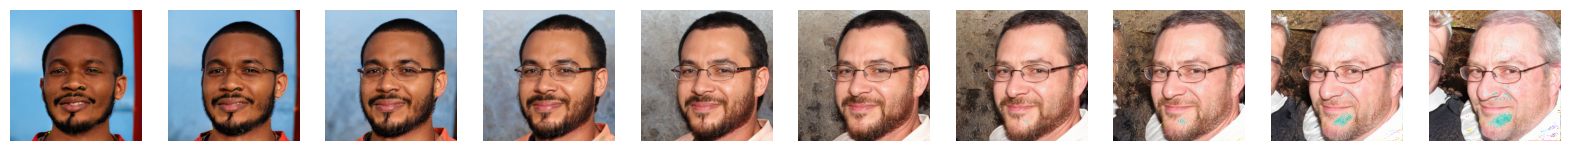

In [12]:
import matplotlib.pyplot as plt

# Generate two random latent vectors
z1 = torch.randn([1, G.z_dim]).cuda()
z2 = torch.randn([1, G.z_dim]).cuda()

# Get the 'w' space representation for both
w1 = G.mapping(z1, None)
w2 = G.mapping(z2, None)

# Interpolate between w1 and w2
num_steps = 10
interpolated_images = []
for t in range(num_steps):
    w_interpolated = (1 - t / (num_steps - 1)) * w1 + (t / (num_steps - 1)) * w2
    img_interpolated = G.synthesis(w_interpolated)
    img_interpolated = (img_interpolated + 1) / 2  # Normalize to [0, 1]
    img_interpolated = img_interpolated.squeeze(0).cpu().detach().numpy().transpose(1, 2, 0)
    img_interpolated = (img_interpolated * 255).astype(np.uint8)
    interpolated_images.append(img_interpolated)

# Display the interpolated images
fig, axes = plt.subplots(1, num_steps, figsize=(20, 2))
for ax, img, t in zip(axes, interpolated_images, range(num_steps)):
    ax.imshow(img)
    ax.axis('off')
plt.show()


In [13]:
# Generate latent vectors
z1 = torch.randn([1, G.z_dim]).cuda()
z2 = torch.randn([1, G.z_dim]).cuda()

# Mapping the latent vectors to w-space
w1 = G.mapping(z1, None)
w2 = G.mapping(z2, None)

# Mix styles: e.g., use w1 for the first half and w2 for the second half of the network
w_mixed = w1.clone()
w_mixed[:, 18:] = w2[:, 18:]  # Mixing on a specific layer index (you can experiment with this)

# Generate the image from the mixed w-space
img_mixed = G.synthesis(w_mixed)
img_mixed = (img_mixed + 1) / 2  # Normalize to [0, 1]
img_mixed = img_mixed.squeeze(0).cpu().detach().numpy().transpose(1, 2, 0)
img_mixed = (img_mixed * 255).astype(np.uint8)

# Display the mixed image
Image.fromarray(img_mixed).show()


In [14]:
import cv2

# Save a sequence of images as a video
video_writer = cv2.VideoWriter('generated_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (512, 512))

# For demonstration, you could generate and save multiple frames
for t in range(100):  # 100 frames
    z = torch.randn([1, G.z_dim]).cuda()
    w = G.mapping(z, None)
    img = G.synthesis(w)
    img = (img + 1) / 2
    img = img.squeeze(0).cpu().detach().numpy().transpose(1, 2, 0)
    img = (img * 255).astype(np.uint8)
    video_writer.write(img)

video_writer.release()
